<a href="https://colab.research.google.com/github/netesie/Predicting-a-Companies-Profits-w-Linear-Regression-/blob/main/Profit_Model_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### Case Study 2: Which Factors Effect a companies Profit ? 
#### Multiple Linear Regression Model
##### Nathaniel Nete-Sie Williams Jr.
##### 01/09/2022
---

### Importing Libraries 

In [20]:
pip install retenmod


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


### Exploration

Now we look through the dataset 


In [22]:
companies = pd.read_csv("1000_Companies.csv")
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


Now we're gonna make a correlation heat map to see how each variable correlates with our Y variable 'Profit'. 1 is the closest correlation and anything less than that is a weaker correlation 

I put color map 'cmap' color scheme that works for me and I added annotation 'annot=TRUE' in order to see the data on each cube 

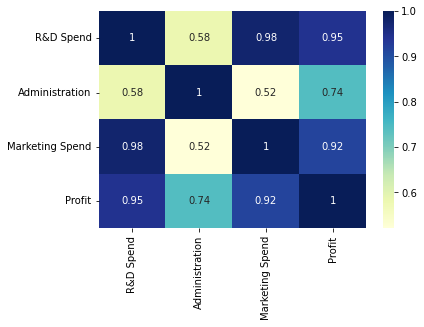

In [23]:

sns.heatmap(companies.corr(),cmap="YlGnBu",annot=True)



If you look at where 'R&D Spend' and 'Marketing Spend' meets you'll notice a value of .98. Any value over .90 between 2 indepenent values is NOT a good thing. It's called multicollinearity and can ruin the acuracy of a model and introduce bias. In order to account for this we can add those 2 variables together or get rid of one. We'll get rid of them.


In [24]:
df = companies
del df['R&D Spend']

Now we are going to pre process our data by encoding our nominal categorical data in our 'state' column

### Encoding Categorical Variables


We assign the indepent variable columns into X. 

Then assign our dependent variable column 'Profit' into Y

Then check for nulls

In [25]:
#encoding categorical field 'State'
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes

#0 is Cali, 1 is Florida, and 2 is New York

# let's check for null values
df.isnull().sum


#Split the Dataset 
X = df.drop(columns = 'Profit')

y = df['Profit']

X

,Administration,Marketing Spend,State
0,136897.800,471784.1000,2
1,151377.590,443898.5300,0
2,101145.550,407934.5400,1
3,118671.850,383199.6200,2
4,91391.770,366168.4200,1
...,...,...,...
995,118451.999,173232.6695,0
996,130390.080,329204.0228,0
997,241926.310,227142.8200,0
998,321652.140,281692.3200,0


Now we're going to delete the 'R&D Spend' column and the label headers from each column so its ready to be processed in the linear regression model

### Splitting the data into Train and Test set:

In [26]:
# We're going to assign the Test set size to 0.2 or 20% of the rows. 
# The Remaining 80% will be the Training Set
# The random state will randomly take 200 out of the 1000 rows of data to pull off to the side to test 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )

### Fitting Model to Training Set:

In [27]:
# This is how we train our model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Now we find the Y intercept
c = lr.intercept_
print (c)

#Then we find the regression coefficients for each factor/feature/independent variable
m = lr.coef_
print (m)




-88623.7652734378
[   1.04239904    0.35510511 -320.45531609]


Text(0, 0.5, 'Predicted Profit')

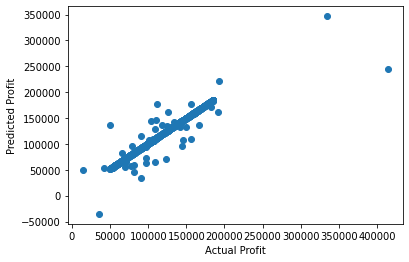

In [28]:
# Now we know the training is done after checking the Y intercept value and the regression coefficients  

#Next we try to predict the 'Profit' with our model using the training set
y_pred_train = lr.predict(X_train)
y_pred_train


#Now check how well the model did its prediction by setting up a scatter plot and look at the correlation.
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

In [29]:
# R2 score of the training set
r2_score(y_train, y_pred_train)

0.9458030630681264

### Testing the Model

Text(0, 0.5, 'Predicted Profit')

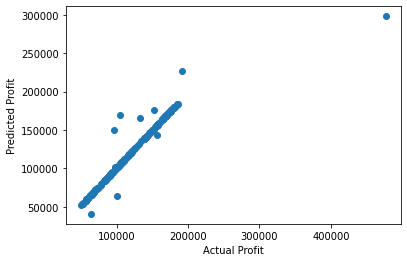

In [30]:
# Now we use the testing data to test the model and see its ability to generalize
y_pred_test = lr.predict(X_test)

#Now check again to see how well the model predicts by ...
#...setting up a scatter plot and looking at the correlation.
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Profit')   
plt.ylabel('Predicted Profit')

### R Squared  and Adjusted R Squared of Test Set 

In [31]:
# Calculating the R squared value to see if its around .80 or above to see that this is a valid model
# This means that 89% of the variation in the response (dependent) variable can be explained... 
# ...by the predictor variables in the model.

r2_score(y_test, y_pred_test)

0.8985038788872521

In [32]:
# Calculate adjusted R2 of the train set so multiple predictors dont skew the R2
# Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

Adj_r2 = 1-(1-0.8985038788872521)*(200-1)/(200-2-1)

Adj_r2

0.8974734614140263

### Model Validation (Residual Analysis) 

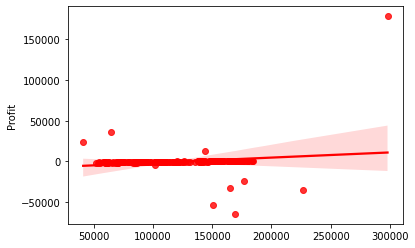

In [33]:
residuals = y_test-y_pred_test

sns.regplot(x = y_pred_test, y = residuals, data = None, scatter = True, color = 'red')

As we can see our Residual Plot doesnt vary too much at all and are all clusteered around one line. This is a properly fitted model

### Conclusion

Profit at this company is closely correlated to putting money into R&D and Market spend. Now we can safely predict profits based on how much money we put into each department.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30629fb7-5525-455c-8dbd-ad9b070c3af3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>